In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [2]:
def image_negation(image):
    return 255 - image

def thresholding(image, threshold_value=127):
    _, binary_threshold = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    return binary_threshold

def inverse_thresholding(image, threshold_value=127):
    _, binary_threshold_inv = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY_INV)
    return binary_threshold_inv

def brighten_image(image, value=50):
    return cv2.add(image, np.full(image.shape, value, dtype=np.uint8))

def darken_image(image, value=50):
    return cv2.subtract(image, np.full(image.shape, value, dtype=np.uint8))

def bit_plane_slicing(image, bit_plane=1):
    # Extract specific bit plane (0-7) where bit_plane=1 is the LSB and bit_plane=8 is the MSB.
    bit_plane_image = np.bitwise_and(image, 1 << (bit_plane - 1)) >> (bit_plane - 1)
    return bit_plane_image * 255  # Convert to 0 or 255 for visualization


In [3]:
def get_image_choice():
    print("Choose an operation:")
    print("1. Negation")
    print("2. Thresholding")
    print("3. Inverse Thresholding")
    print("4. Brighten")
    print("5. Darken")
    print("6. Bit Plane Slicing")

    try:
        choice = int(input("Enter your choice (1/2/3/4/5/6): "))
        if choice not in range(1, 7):
            raise ValueError("Invalid choice")
        return choice
    except ValueError as e:
        print(f"Error: {e}. Please enter a valid choice between 1 and 6.")
        return None

def process_image_choice(image, choice):
    operations = {
        1: image_negation,
        2: thresholding,
        3: inverse_thresholding,
        4: brighten_image,
        5: darken_image,
        6: bit_plane_slicing
    }

    if choice in [4, 5]:  # For operations that need a value input
        try:
            value = int(input("Enter intensity value (e.g., 50): "))
            return operations[choice](image, value)
        except ValueError:
            print("Error: Invalid intensity value entered.")
            return None
    elif choice == 6:  # For bit plane slicing
        try:
            bit_plane = int(input("Enter the bit plane to slice (1-8): "))
            if not (1 <= bit_plane <= 8):
                raise ValueError("Invalid bit plane number.")
            return operations[choice](image, bit_plane)
        except ValueError as e:
            print(f"Error: {e}. Please enter a valid bit plane between 1 and 8.")
            return None
    else:  # Other operations
        return operations[choice](image)


In [4]:
def main():
    image_path = '/content/girl.jpg'
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Image not found at {image_path}!")
        return

    print("Original Image Matrix:\n", image)

    choice = get_image_choice()
    if choice is None:
        return  # Invalid choice entered, exit early

    processed_image = process_image_choice(image, choice)
    if processed_image is None:
        return  # If processing fails, exit early

    print("\nProcessed Image Matrix:\n", processed_image)

    cv2_imshow(image)
    cv2_imshow(processed_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Original Image Matrix:
 [[241 241 242 ...  64  56  53]
 [240 241 241 ...  66  58  55]
 [240 240 241 ...  69  60  56]
 ...
 [230 235 241 ... 231 231 231]
 [229 234 240 ... 231 231 231]
 [229 234 240 ... 231 231 231]]
Choose an operation:
1. Negation
2. Thresholding
3. Inverse Thresholding
4. Brighten
5. Darken
6. Bit Plane Slicing
Enter your choice (1/2/3/4/5/6): 4
Enter intensity value (e.g., 50): 46

Processed Image Matrix:
 [[255 255 255 ... 110 102  99]
 [255 255 255 ... 112 104 101]
 [255 255 255 ... 115 106 102]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


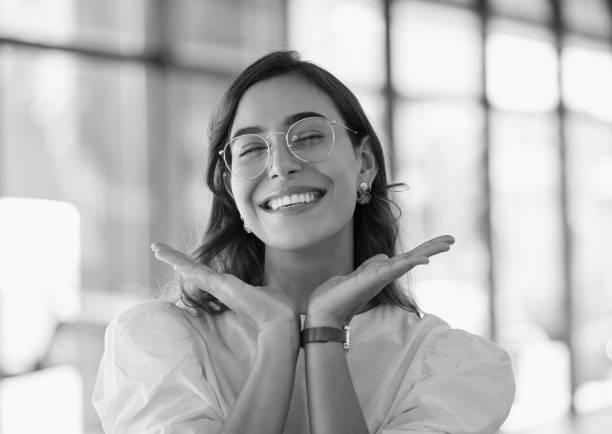

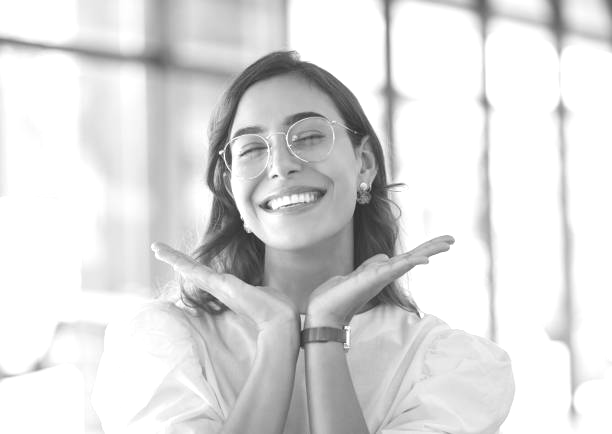

In [5]:
main()